#**პრაქტიკული დავალება #4**
## **ვადა (deadline): 10 ივნისი 9:00AM**

- თითოეული სავარჯიშო ფასდება შესაბამისი ქულით, რაც ჯამში შეადგენს **7 ქულას**

## **სავარჯიშო 1:** ერთცვლადიანი წრფივი რეგრესია (**1 ქულა**)

- ააგეთ დღის მინიმალური ტემპერატურის საპროგნოზო მოდელი ერთცვლადიანი წრფივი რეგრესიის გამოყენებით.
- გამოსახეთ ემპირიკული მონაცემები (გაფანტულობის დიაგრამით) და რეგრესიის წირი.
- იპოვეთ შემდეგი მაჩვენებლები და გააკეთეთ დასკვნა მოდელის ხარისხზე:
  1. $R^2$ (დეტერმინაციის კოეფიციენტი):
  $$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$
  სადაც $y_i$ არის ფაქტობრივი მნიშვნელობა, $\hat{y}_i$ არის პროგნოზირებული მნიშვნელობა, და $\bar{y}$ არის ფაქტობრივი მნიშვნელობების საშუალო.

  2. საშუალო კვადრატული ცდომილების ფესვი (RMSE - Root Mean Squared Error):
  $$RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$

  3. საშუალო აბსოლუტური ცდომილება (MAE - Mean Absolute Error):
  $$MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$$


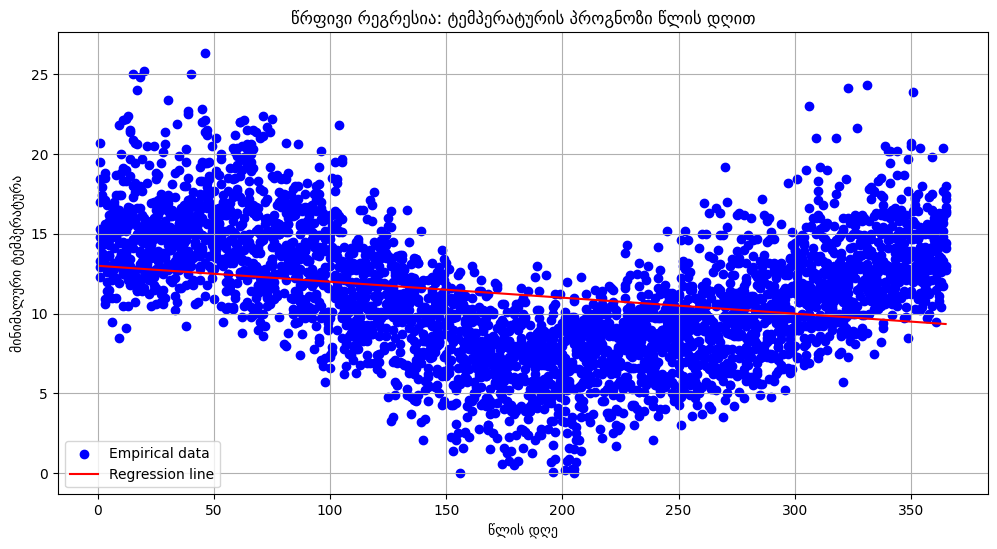

R2: 0.08
RMSE: 3.97
MAE: 3.18


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# მონაცემები
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
data = pd.read_csv(url, parse_dates=['Date'])

# წლის დღის ველის შექმნა
data['DayOfYear'] = data['Date'].dt.dayofyear

# მონაცემების მომზადება
X = data[['DayOfYear']]
y = data['Temp']

# მონაცემების გაყოფა საწვრთნელ და სატესტო ნაწილებად
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# მოდელის გაწვრთნა
model = LinearRegression()
model.fit(X_train, y_train)

# პროგნოზი
y_pred = model.predict(X_test)

# ვიზუალიზება
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Empirical data')
plt.plot(X, model.predict(X), color='red', label='Regression line')
plt.xlabel('წლის დღე')
plt.ylabel('მინიმალური ტემპერატურა')
plt.title('წრფივი რეგრესია: ტემპერატურის პროგნოზი წლის დღით')
plt.legend()
plt.grid(True)
plt.show()

# შეფასება
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f'R2: {r2:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')


## **სავარჯიშო 2:** მრავალცვლადიანი წრფივი რეგრესია (**1 ქულა**)
- ააგეთ ავტომობილის ფასის საპროგნოზო მოდელი სამცვლადიანი წრფივი რეგრესიის გამოყენებით (მაგ. მანქანის წონა "curb weight', საწვავის ხარჯი ქალაქში "city mpg", ცხენის ძალა "horsepower").
- ააგეთ ნაპროგნოზები და ემპირიკული მონაცემების გაფანტულობის დიაგრამა.
- იპოვეთ $R^2$, RMSE, MAE და გამოიტანეთ დასკვნები მოდელის ხარისხზე.

Price = -18607.85 + 10.15*CurbWeight + 69.40*CityMPG + 34.54*Horsepower


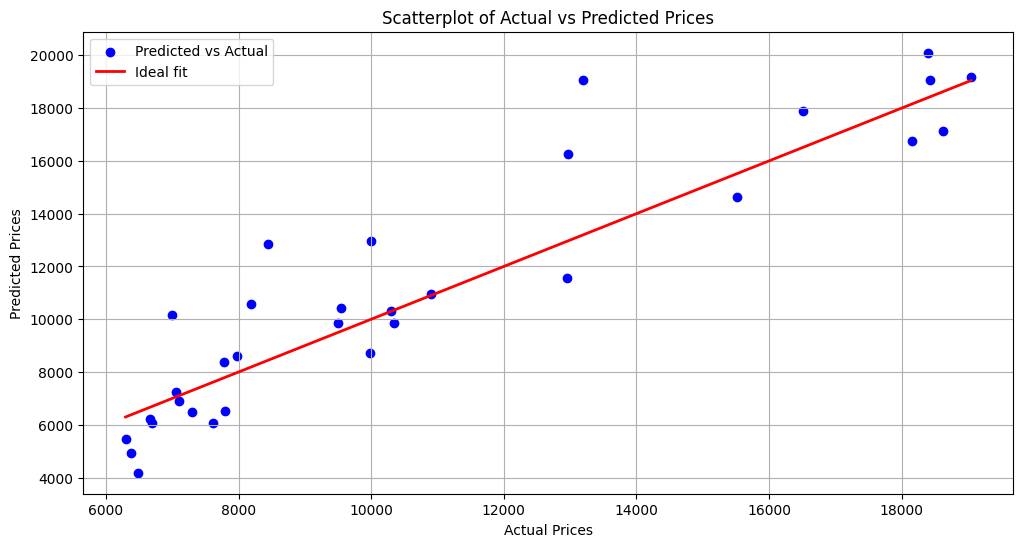

R2: 0.79
RMSE: 1920.74
MAE: 1406.77


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import seaborn as sns

# მონაცემები
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
column_names = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration", "num_doors",
                "body_style", "drive_wheels", "engine_location", "wheel_base", "length", "width", "height",
                "curb_weight", "engine_type", "num_cylinders", "engine_size", "fuel_system", "bore", "stroke",
                "compression_ratio", "horsepower", "peak_rpm", "city_mpg", "highway_mpg", "price"]
data = pd.read_csv(url, names=column_names, na_values="?", header=None)

# ცარიელების წაშლა
data = data.dropna()

# საჭირო ველების რიცხვით ფორმატში გადაყვანა
data[['curb_weight', 'city_mpg', 'horsepower', 'price']] = data[['curb_weight', 'city_mpg', 'horsepower', 'price']].apply(pd.to_numeric)

# მონაცემების მომზადება
X = data[['curb_weight', 'city_mpg', 'horsepower']]
y = data['price']

# მონაცემების გაყოფა საწვრთნელ და სატესტო ნაწილებად
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# მოდელის გაწვრთნა
model = LinearRegression()
model.fit(X_train, y_train)

# პროგნოზი
y_pred = model.predict(X_test)

# წამოვიღოთ რეგრესიის კოეფიციენტები (regression coefficients) და გადაკვეთა (intercept)
coefficients = model.coef_
intercept = model.intercept_

# დაბეჭდეთ რეგრესიის ფორმულა
formula = f'Price = {intercept:.2f} + {coefficients[0]:.2f}*CurbWeight + {coefficients[1]:.2f}*CityMPG + {coefficients[2]:.2f}*Horsepower'
print(formula)

# ნაპროგნოზები და ემპიტიკული მნიშვნელობების გაფანტულობის დიაგრამა (scatterplot)
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal fit')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Scatterplot of Actual vs Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()

# შეფასება
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f'R2: {r2:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')


## **სავარჯიშო 3**: პოლინომიალური რეგრესია (**1 ქულა**)
- ააგეთ დღის მინიმალური ტემპერატურის საპროგნოზო მოდელი ერთცვლადიანი პოლინომიალური რეგრესიის გამოყენებით.
- გამოსახეთ ემპირიკული მონაცემები (გაფანტულობის დიაგრამით) და რეგრესიის წირი.
- იპოვეთ $R^2$, RMSE, MAE და გამოიტანეთ დასკვნები მოდელის ხარისხზე.
- შეადარეთ 1-ელი და მე-3 სავარჯიშოების შედეგები.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


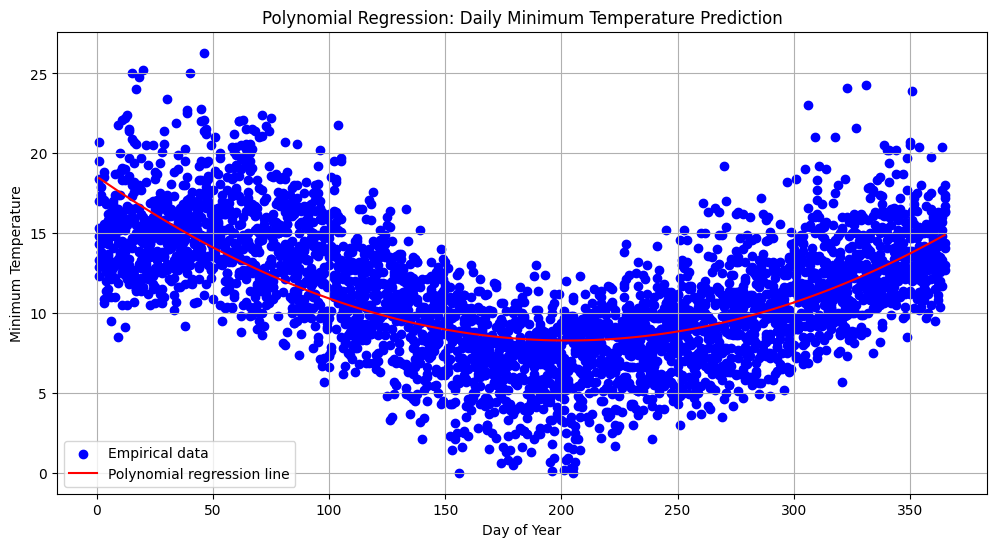

R2: 0.47
RMSE: 3.03
MAE: 2.39


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# მონაცემები
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
data = pd.read_csv(url, parse_dates=['Date'])

# წლის დღის ველის შექმნა
data['DayOfYear'] = data['Date'].dt.dayofyear

# მონაცემების მომზადება
X = data[['DayOfYear']]
y = data['Temp']

# მონაცემების გაყოფა საწვრთნელ და სატესტო ნაწილებად
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# პოლინომიალური რეგრესია
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

model = LinearRegression()
model.fit(X_poly_train, y_train)

# პროგნოზი
y_pred = model.predict(X_poly_test)

# ვიზუალიზება
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Empirical data')
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_poly_plot = poly.transform(X_plot)
plt.plot(X_plot, model.predict(X_poly_plot), color='red', label='Polynomial regression line')
plt.xlabel('Day of Year')
plt.ylabel('Minimum Temperature')
plt.title('Polynomial Regression: Daily Minimum Temperature Prediction')
plt.legend()
plt.grid(True)
plt.show()

# შეფასება
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f'R2: {r2:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')

# პოლინომიური რეგრესიის მოდელი უკეთ მუშაობს ვიდრე წრფივი რეგრესიის მოდელი ყველა მეტრიკაში
# პოლინომიური რეგრესიის მოდელი უფრო მეტ განსხვავებას ხსნის მონაცემებში და უზრუნველყოფს უფრო ზუსტ პროგნოზებს მცირე შეცდომებით.
# ვიზუალურად, პოლინომიური რეგრესიის ხაზი უკეთესად მიჰყვება ემპირიული მონაცემების ნიმუშს, რაც მიუთითებს უკეთეს მორგებაზე.

## **სავარჯიშო 4**: დროითი მწკრივის დეკომპოზიცია (**1 ქულა**)

მოცემულია ონლაინ გაყიდვების ყოველთვიური მონაცემები
- დაშალეთ დროითი მწკრივი ტრენდად (trend), სეზონურ კომპონენტად (seasonality) და ნარჩენებად (residuals).
- შეაფასეთ, ავლენს თუ არა სეზონურობას.




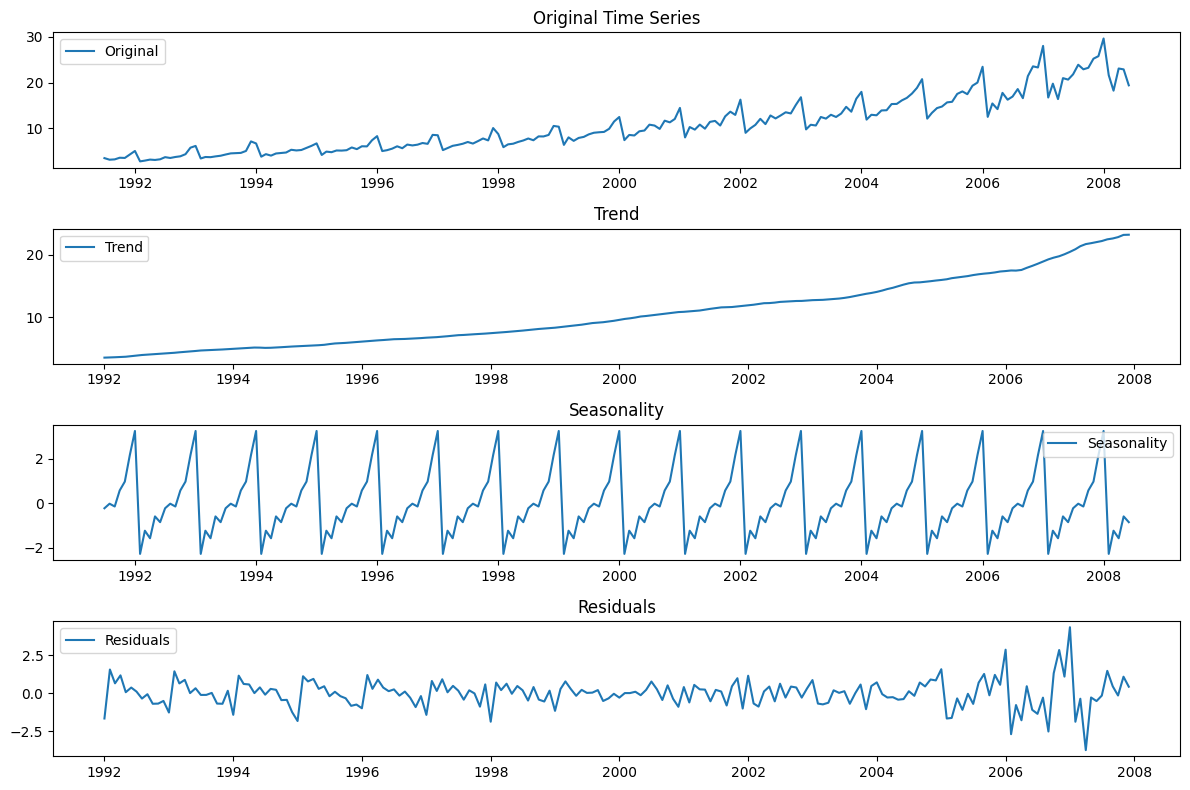

Trend Component:
 date
1992-01-01    3.503344
1992-02-01    3.527891
1992-03-01    3.565511
1992-04-01    3.600447
1992-05-01    3.647703
Name: trend, dtype: float64
Seasonality Component:
 date
1991-07-01   -0.227809
1991-08-01   -0.023116
1991-09-01   -0.149022
1991-10-01    0.569161
1991-11-01    0.966836
1991-12-01    2.150177
1992-01-01    3.235125
1992-02-01   -2.272000
1992-03-01   -1.233826
1992-04-01   -1.571464
1992-05-01   -0.593198
1992-06-01   -0.850864
Name: seasonal, dtype: float64
Residual Component:
 date
1992-01-01   -1.650134
1992-02-01    1.558629
1992-03-01    0.654126
1992-04-01    1.175797
1992-05-01    0.073073
Name: resid, dtype: float64
Seasonal Variation (Variance): 2.23


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# მონაცემები
url = 'https://raw.githubusercontent.com/selva86/datasets/master/a10.csv'
data = pd.read_csv(url, parse_dates=['date'], index_col='date')

decomposition = seasonal_decompose(data['value'], model='additive', period=12)

plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(data['value'], label='Original')
plt.legend(loc='best')
plt.title('Original Time Series')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.title('Trend')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.title('Seasonality')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.title('Residuals')

plt.tight_layout()
plt.show()

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

print("Trend Component:\n", trend.dropna().head())
print("Seasonality Component:\n", seasonal.head(12))
print("Residual Component:\n", residual.dropna().head())

seasonal_variation = seasonal.var()
print(f'Seasonal Variation (Variance): {seasonal_variation:.2f}')

#აღწერს სოზონურობას


## **სავარჯიშო 5:** პროგნოზირება ექსპონენციალური გაგლუვებით (**1 ქულა**)

- ექსპონენციალური გაგლუვების მეთოდით იპროგნოზეთ გაყიდვები მომავალი 12 თვის მანძილზე



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


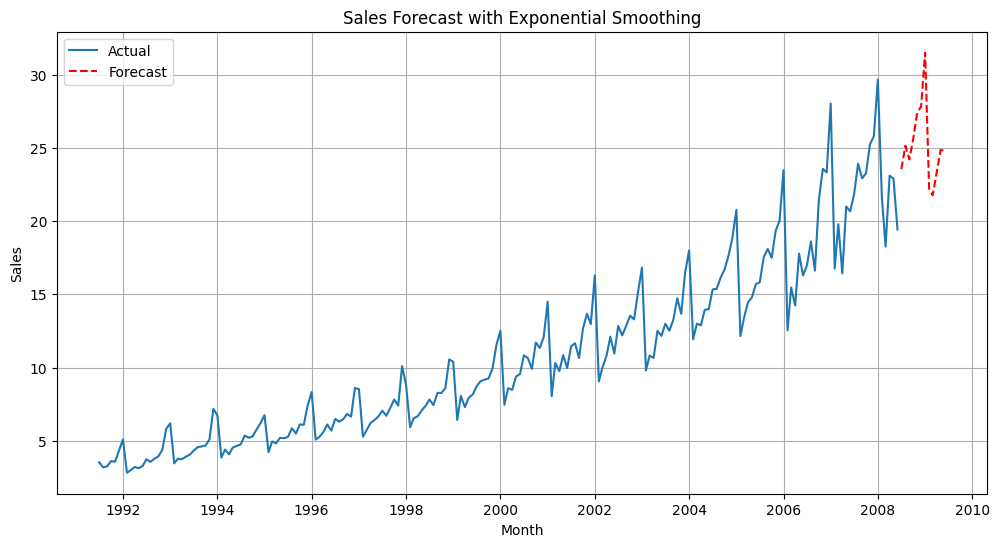

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


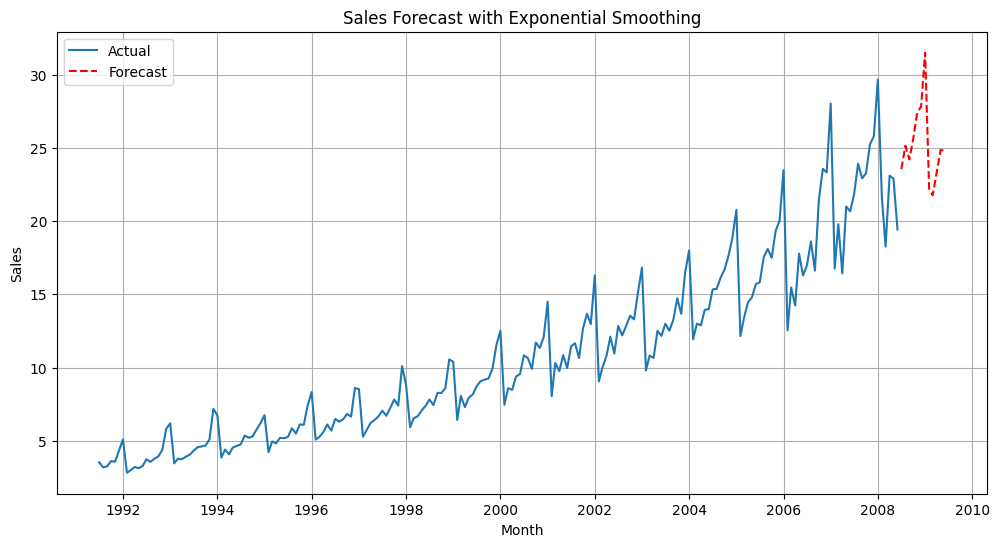

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the data
url = 'https://raw.githubusercontent.com/selva86/datasets/master/a10.csv'
data = pd.read_csv(url, parse_dates=['date'], index_col='date')

# Apply exponential smoothing model and forecast
model = ExponentialSmoothing(data['value'], trend='add', seasonal='add', seasonal_periods=12).fit()
forecast = model.forecast(steps=12)

# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(data['value'], label='Actual')
plt.plot(forecast, label='Forecast', linestyle='--', color='red')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales Forecast with Exponential Smoothing')
plt.legend()
plt.grid(True)
plt.show()

# მონაცემები
url = 'https://raw.githubusercontent.com/selva86/datasets/master/a10.csv'
data = pd.read_csv(url, parse_dates=['date'], index_col='date')

# ექსპონენციალური გაგლუვება და პროგნოზი
model = ExponentialSmoothing(data['value'], trend='add', seasonal='add', seasonal_periods=12).fit()
forecast = model.forecast(steps=12)

plt.figure(figsize=(12, 6))
plt.plot(data['value'], label='Actual')
plt.plot(forecast, label='Forecast', linestyle='--', color='red')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales Forecast with Exponential Smoothing')
plt.legend()
plt.grid(True)
plt.show()

## **სავარჯიშო 6:** პროგნოზირება ARIMA მოდელით (**1 ქულა**)

- ARIMA მოდელით დააპროგნოზეთ ონლაინ გაყიდვები მომავალი 12 თვის მანძილზე.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


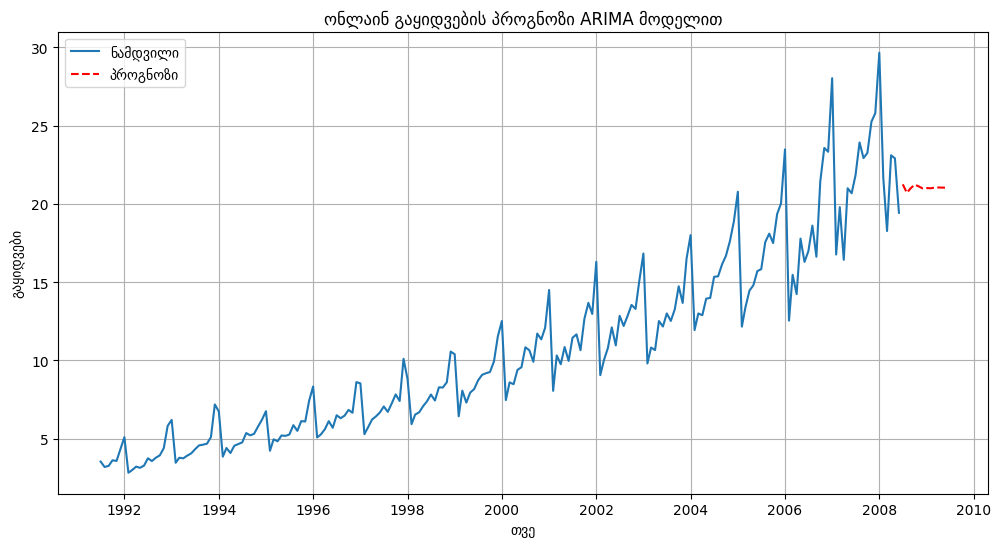

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# მონაცემები
url = 'https://raw.githubusercontent.com/selva86/datasets/master/a10.csv'
data = pd.read_csv(url, parse_dates=['date'], index_col='date')

# ARIMA მოდელი და პროგნოზი
model = ARIMA(data['value'], order=(5, 1, 0)).fit()
forecast = model.forecast(steps=12)

# გრაფიკი
plt.figure(figsize=(12, 6))
plt.plot(data['value'], label='ნამდვილი')
plt.plot(forecast.index, forecast, label='პროგნოზი', linestyle='--', color='red')
plt.xlabel('თვე')
plt.ylabel('გაყიდვები')
plt.title('ონლაინ გაყიდვების პროგნოზი ARIMA მოდელით')
plt.legend()
plt.grid(True)
plt.show()


## **სავარჯიშო 7:** ავტოკორელაცია (ACF) და კერძო ავტოკორელაცია (PACF) (**1 ქულა**)

- გრაფიკზე გამოსახეთ ავტოკორელაციის (ACF) და კერძო ავტოკორელაციის (PACF) ფუნქციები

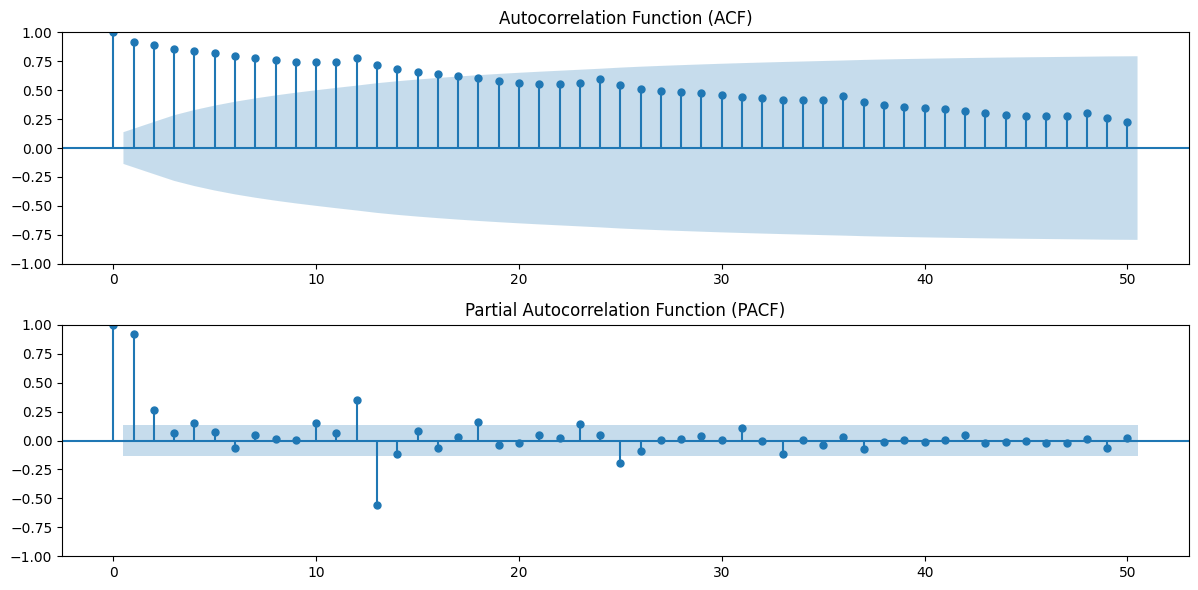

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Data
url = 'https://raw.githubusercontent.com/selva86/datasets/master/a10.csv'
data = pd.read_csv(url, parse_dates=['date'], index_col='date')

# Plot ACF and PACF
plt.figure(figsize=(12, 6))

plt.subplot(211)
plot_acf(data['value'], lags=50, ax=plt.gca(), title='Autocorrelation Function (ACF)')

plt.subplot(212)
plot_pacf(data['value'], lags=50, ax=plt.gca(), title='Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()
